<a href="https://colab.research.google.com/github/drscook/m5364_23sp_data_science1/blob/main/CEE_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Free Cloud Computing 
## It's not just π in the sky
## April 19, 2023
## Tarleton State University
## Educational Excellence Week
### Dr. Scott Cook
### Chief Data Scientist & Assoc Prof of Mathematics

In [1]:
# upgrade to most recent versions (Pandas 2.0 released on April 6, 2023)
# run once at start of session
# ignore any "pip dependency" errors
! pip install -q --upgrade numpy pandas scikit-learn jupyter-autotime
# restart kernel so upgrade takes effect
from IPython import get_ipython
get_ipython().kernel.do_shutdown(True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.0 which is incompatible.


{'status': 'ok', 'restart': True}

Major Scientific Python Packages
1. Numpy - https://numpy.org/ - Foundational scientific computing package (arrays)
1. Pandas - https://pandas.pydata.org/ - Most important data science package (dataframes)
1. Scikit-Learn - https://scikit-learn.org - Machine Learning
1. Jupyter Notebook - https://jupyter.org/ - Front end user interface you are using now
1. Google Colab - https://colab.research.google.com/ - Cloud compute platform you are using now





Let's do a little machine learning project using the Boston Airbnb dataset from OpenML.org https://www.openml.org/search?type=data&status=active&id=43819

In [1]:
from sklearn.datasets import fetch_openml
airbnb = fetch_openml(data_id=43819, parser="auto")
airbnb.data.head(3)

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,...,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28
1,5506,**49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10.0,10.0,9.0,10.0,t,STR-404620,t,f,strict_14_with_grace_period,0.88


We could directly use as is. But, most projects use data stored in a local file, like a csv. So, to demonstrate how to read a csv, we will write to a csv and then read it back in.

Warning: Colab borrows a machine from Google for you to use.  But Google wants it back when you are done. This Jupyter notebook automatically saves to your Google Drive (folder "Colab Notebook"). But any other file you upload or create will be deleted unless you mount and save to your google drive.

There are 2 ways to mount Drive.
1. Try cell below
1. If it errs, click the folder icon on far left under {x}, then click icon of folder with triangle (says Mount Drive when you hover over it)

In [ ]:
import pathlib, google.colab, pandas as pd
root = pathlib.Path("/content/drive")
google.colab.drive.mount(str(root))

Cell below 
1. creates a folder named "CEE_workshop" in drive/MyDrive
1. saves data to a csv file
1. reads data back in

In [3]:
path = root / "MyDrive/CEE_workshop"
path.mkdir(exist_ok=True)
file = path / "airbnb.csv"
airbnb.data.to_csv(file, index=False)  # saves to your drive
df = pd.read_csv(file) # reads that file back in

If you need to read a csv, simply upload it to google drive, edit the path to point at it, and use read_csv. Pandas supports other file formats like excel, parquet, json, pickle, hdf, and more.

We typically spend a lot of time doing data exploration and visualization at the start of a project so we can make smart choices about data wrangling and modeling approaches. Python has some fantastic [visualization packages](https://pyviz.org/overviews/index.html) like [Bokeh](https://docs.bokeh.org/), [Seaborn](https://seaborn.pydata.org/), [Plotly](https://plotly.com/python/), [Matplotlib](https://matplotlib.org/), and many others.

There are many great tutorials online for that. So, for the sake of time, we'll assume you've completed this step and skip to wrangling and modeling.

Again, the goal of this workshop is to show what is possible using Colab.  It is not meant to teach Python. So don't worry about understanding all the code below.

Our task: Predict "review_scores_value".  This is the overall rating for an airbnb property and combines the other "review_scores_X" columns.  So, we can't use those columns as inputs (features) ... that would be cheating.

In [4]:
import pathlib, numpy as np, pandas as pd, sklearn, missingno as msno
from sklearn import set_config
set_config(transform_output = "pandas")

df = pd.read_csv(file).convert_dtypes().set_index('id') # convert_dtypes activates new "nullable" datatypes in pandas https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/integer_na.html

# little helper to easily show the first 3 lines as we progress through data wrangling
def disp(X):
    display(X.head(3))

# force all strings to lower case
# Python style guides prefer "easier to ask forgivenes than permission" over "look before you leap"
# Some columns are not strings. We simply attempt to lower case everything and fail gracefully for non-strings.
for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except AttributeError:
        pass
disp(df)

# price has entries like "6,000.00". The comma forces this to be a string rather than float.  Let's fix that
df['price'] = df['price'].str.replace(',','').astype(float)

# house_rules is free-form text.  Let's try to deterimine if pets and smoking are allowed
# We guess that pets are allowed unless "no pets" appears in house_rules. This will miss other
# expressions like "pets are not allowed".
df['pets_ok'] = ~df['house_rules'].str.contains('no pets')

# During data exploration, we observed anytime smoking was discussed in house_rules, it was prohibited.
# In other words, we did not see explicit permission to smoke.
# So, we'll crudely assume that smoking is prohibited anytime "smok" appears in house_rules
df['smoking_ok'] = ~df['house_rules'].str.contains('smok')

# If we wanted to be more careful, we could search for multiple expressions like this:
# df['smoking_ok'] = ~df['house_rules'].str.contains('|'.join(['smoking', 'non smoking', 'non-smoking', 'smoking not permitted', 'smoking is not permitted']))
# https://stackoverflow.com/questions/48541444/pandas-filtering-for-multiple-substrings-in-series/48600345#48600345

,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
3781,harborside-walk to subway,fully separate apartment in a two apartment bu...,guests solely occupy the 1 floor apartment wit...,we sometimes travel. always available via: mob...,"no pets, no smoking.",4804,2008-12-03,massachusetts,within a few hours,100,...,10,10,10,10,t,<NA>,f,f,super_strict_30,0.28
5506,**49 special ** private! minutes to center!,"private guest room with private bath, you do n...",you get full access to the guest room with pri...,"we give guests privacy, but we are available ...",no smoking in the building.,8229,2009-02-19,"boston, massachusetts, united states",within an hour,100,...,10,10,9,10,t,exempt: this listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
6695,99 special!! home away! condo,"comfortable, fully equipped private apartment...","full private apartment. 1 bedroom, kitchen, ...",<NA>,no smoking in the building.,8229,2009-02-19,"boston, massachusetts, united states",within an hour,100,...,10,10,9,10,t,str-404620,t,f,strict_14_with_grace_period,0.88


<Axes: >

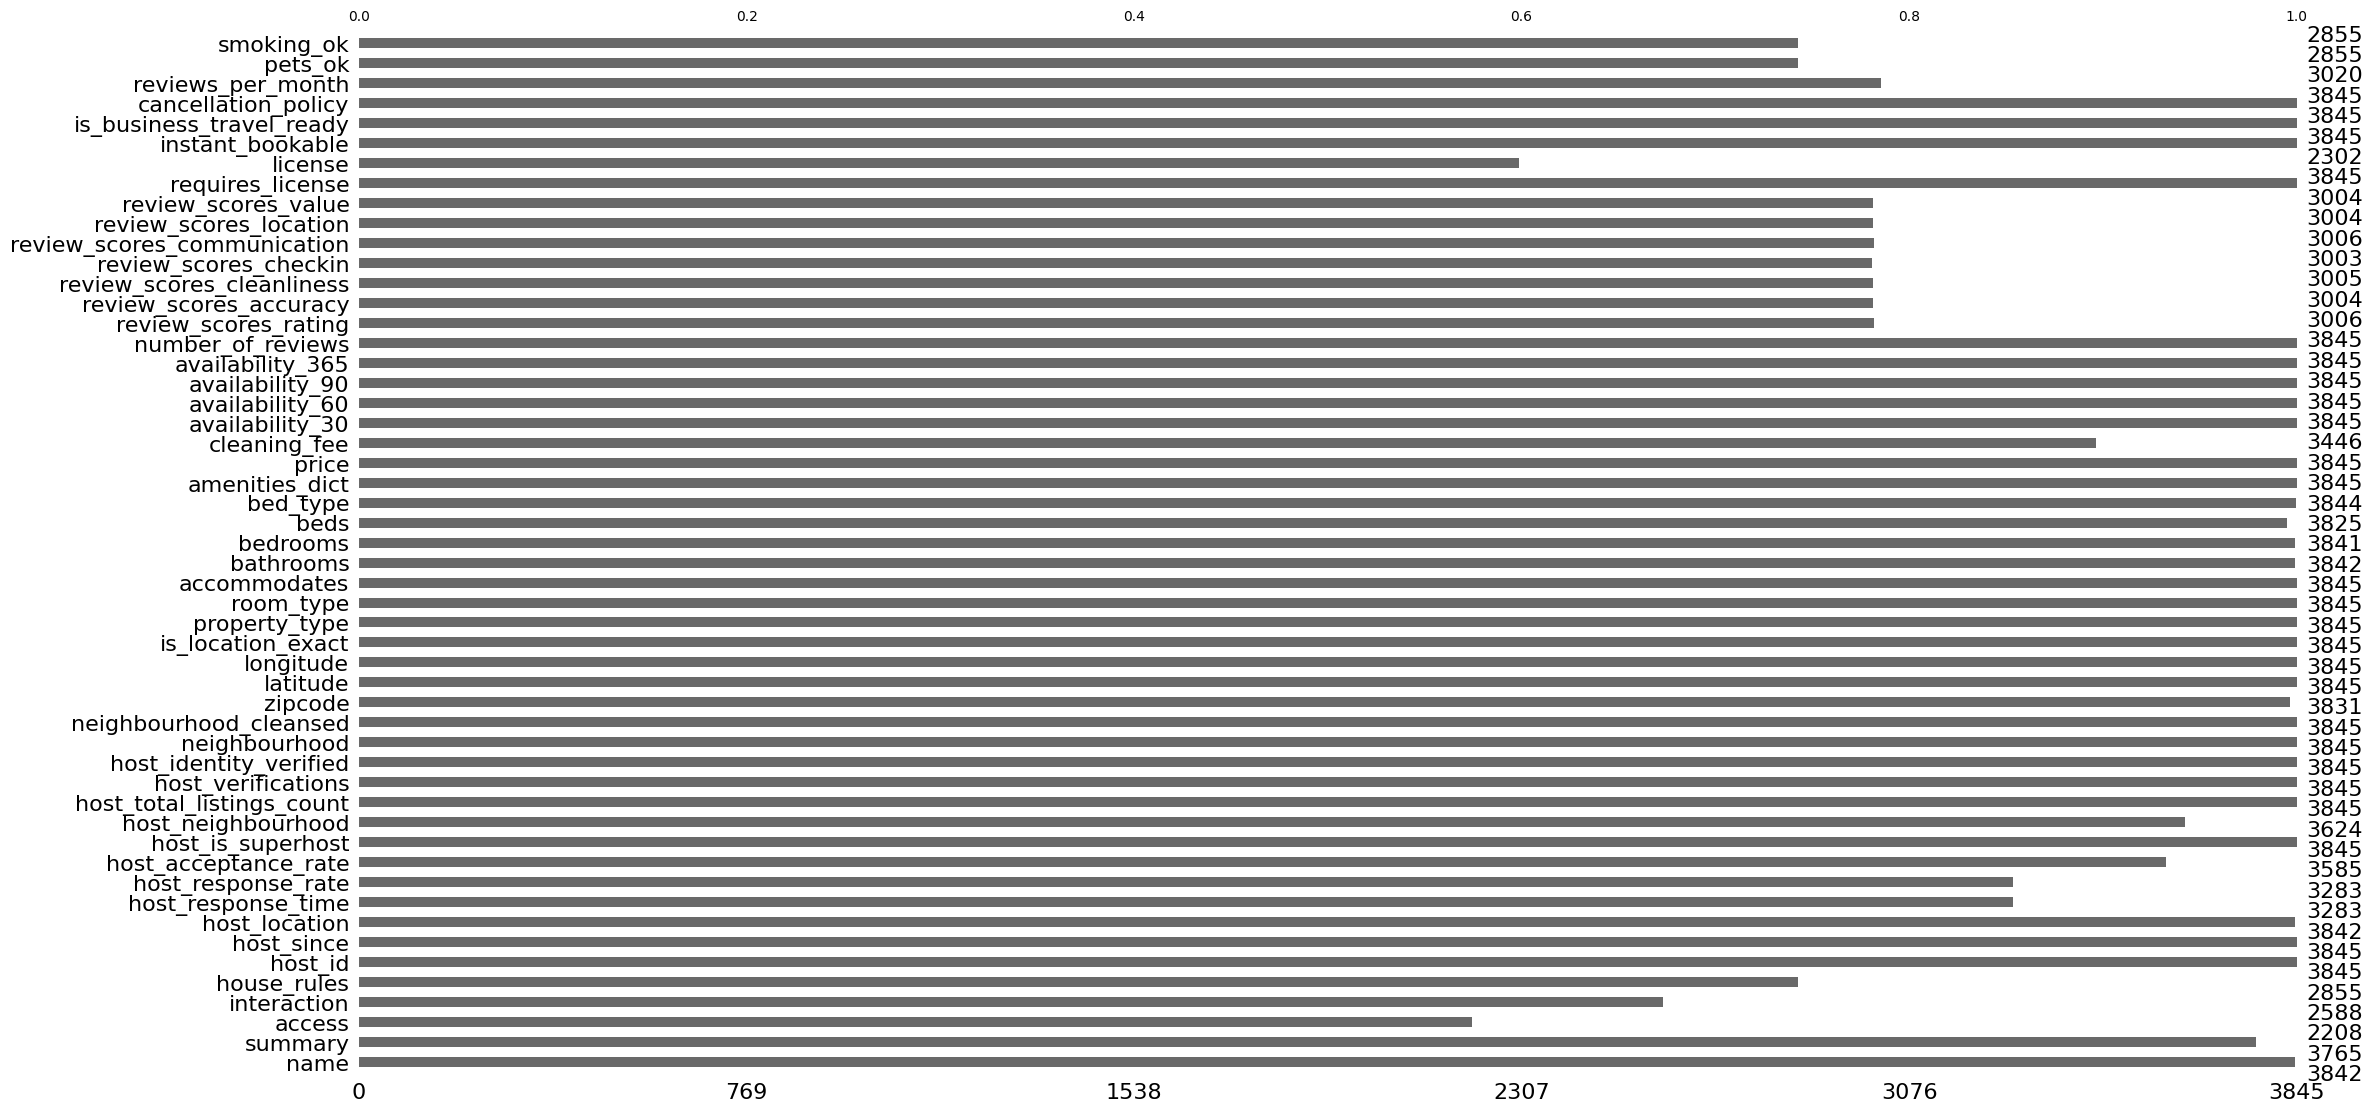

In [5]:
# Look for missing data
msno.bar(df)

<Axes: >

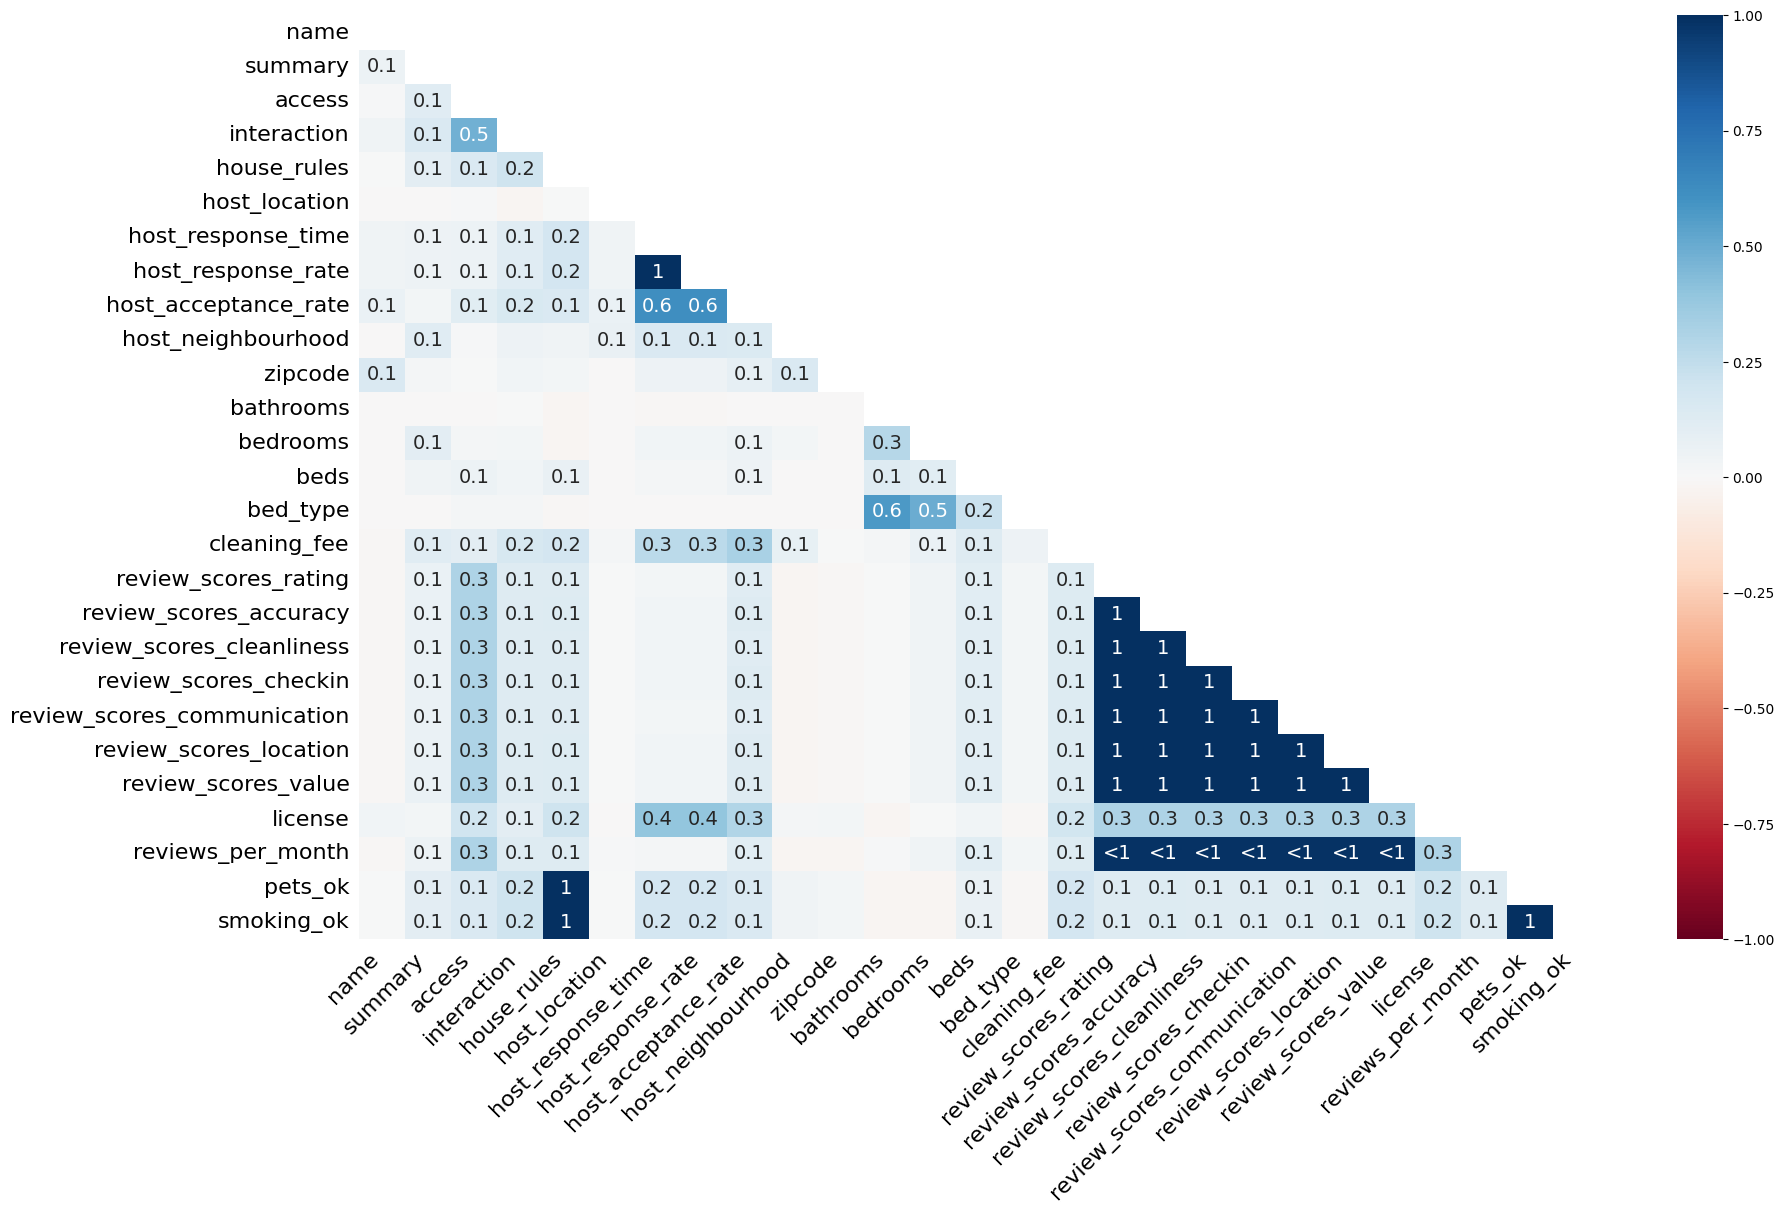

In [6]:
# Correlations of missing data among pairs of columns
msno.heatmap(df)

<Axes: >

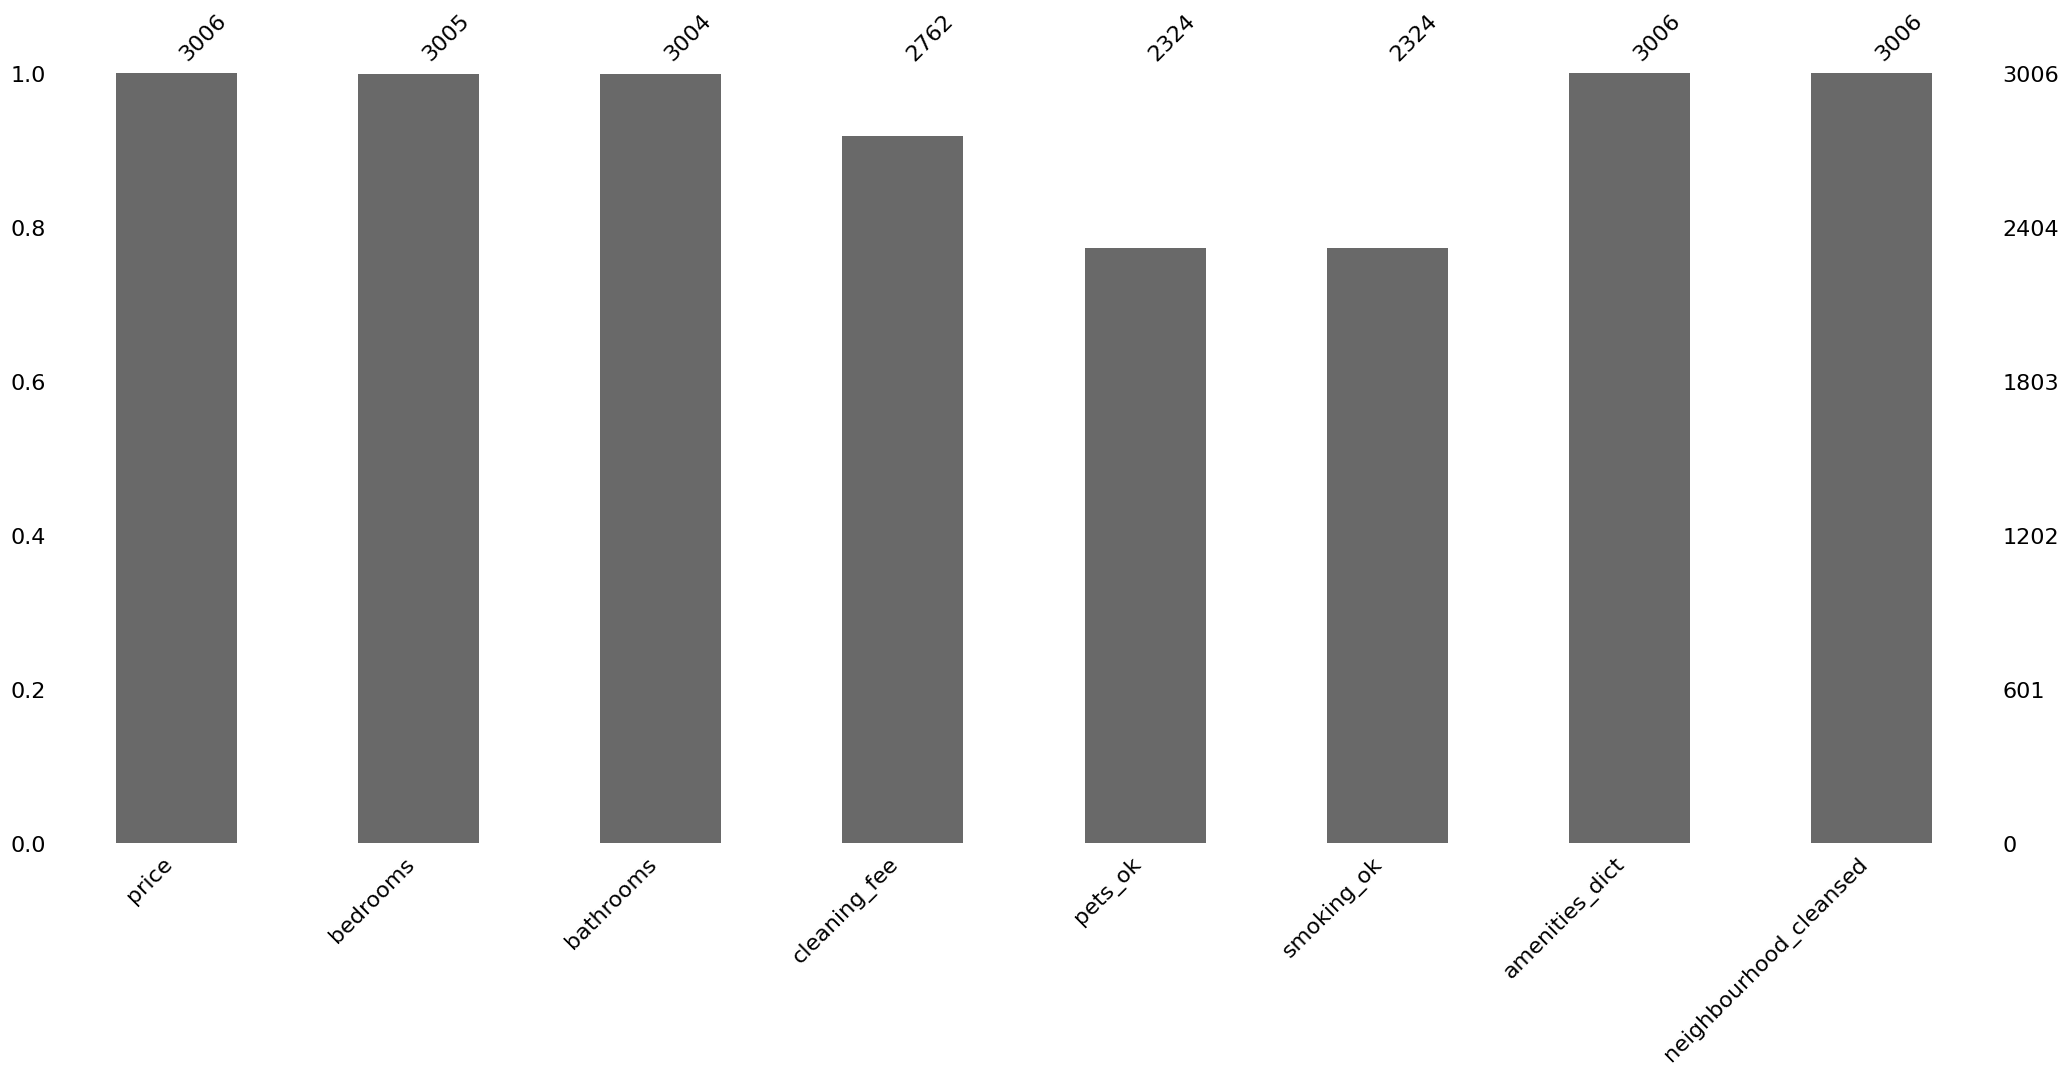

In [7]:
target = 'review_scores_rating'

# decide which columns we will use as features (inputs) in the model
features = [
    'price',
    'bedrooms',
    'bathrooms',
    'cleaning_fee',
    'pets_ok',
    'smoking_ok',
    'amenities_dict',
    'neighbourhood_cleansed',
]
numeric_features = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok']  # which features are already numeric

mask = df[target].notnull() # find columns where target is NOT missing
F = df.loc[mask, features]  # feature dataframe of feature columns and rows where target is not missing
y = df.loc[mask, target]    # target dataframe of target column and rows where target is not missing
msno.bar(F)

amenities_dict looks important - it indicates which amenities the property offers.  However, it has been stored in a rather awkward format.  Let's extract it as indicator (dummy) variables.

In [8]:
for x in F['amenities_dict'][:3]:
    print(x)

'tv': 1, 'cable tv': 1, 'wifi': 1, 'air conditioning': 1, 'kitchen': 1, 'free parking on premises': 1, 'free street parking': 1, 'heating': 1, 'washer': 1, 'dryer': 1, 'smoke detector': 1, 'carbon monoxide detector': 1, 'essentials': 1, 'shampoo': 1, '24-hour check-in': 1, 'hangers': 1, 'hair dryer': 1, 'iron': 1, 'laptop friendly workspace': 1, 'hot water': 1, 'bed linens': 1, 'extra pillows and blankets': 1, 'microwave': 1, 'coffee maker': 1, 'refrigerator': 1, 'dishwasher': 1, 'dishes and silverware': 1, 'cooking basics': 1, 'oven': 1, 'stove': 1, 'patio or balcony': 1, 'internet': 0, 'family/kid friendly': 0, 'first aid kit': 0, 'fire extinguisher': 0, 'lock on bedroom door': 0, 'self check-in': 0, 'keypad': 0, 'private entrance': 0, 'bathtub': 0, 'luggage dropoff allowed': 0, 'long term stays allowed': 0, 'paid parking off premises': 0, 'doorman': 0, 'elevator': 0, 'other': 0, 'ethernet connection': 0, 'lockbox': 0, '': 0, 'pets allowed': 0, 'buzzer/wireless intercom': 0, 'smart l

In [9]:
# extract amenities into indicator columns
A = F['amenities_dict'].str.split(', ', expand=True)  # split pieces of amentities string into separate columns
disp(A)

amenities_features = A.columns = [x.split(':')[0].strip("'") for x in A.iloc[0]]  # get columns names from row 0
A.columns = amenities_features
disp(A)

def amentity_offered(x):
    return (x.str[-1] == '1').astype('boolean')  # return True if the final character is 1
A = A.apply(amentity_offered)
disp(A)

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
id,,,,,,,,,,,,,,,,,,,,,
3781,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 1,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
5506,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 0,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
6695,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0


,tv,cable tv,wifi,air conditioning,kitchen,free parking on premises,free street parking,heating,washer,dryer,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
id,,,,,,,,,,,,,,,,,,,,,
3781,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 1,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
5506,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 0,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
6695,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0


,tv,cable tv,wifi,air conditioning,kitchen,free parking on premises,free street parking,heating,washer,dryer,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
id,,,,,,,,,,,,,,,,,,,,,
3781,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5506,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
6695,True,True,True,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


Neighborhood might also be important. Most machine learners can't handle categorical variables like this directly, but we can "one-hot-encode" into indicator (dummy) variables.  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)  # create one-hot encoder object
N = enc.fit_transform(F[['neighbourhood_cleansed']])#.astype('boolean')  # apply object to neighborhood_cleansed column
disp(N)

# we don't need the "neighborhood_cleansed_" prefix here, so let's remove it by keeping only charaters 23 and beyond
neighorhoods_features = N.columns.str[23:]
N.columns = neighorhoods_features
disp(N)

,neighbourhood_cleansed_allston,neighbourhood_cleansed_back bay,neighbourhood_cleansed_bay village,neighbourhood_cleansed_beacon hill,neighbourhood_cleansed_brighton,neighbourhood_cleansed_charlestown,neighbourhood_cleansed_chinatown,neighbourhood_cleansed_dorchester,neighbourhood_cleansed_downtown,neighbourhood_cleansed_east boston,...,neighbourhood_cleansed_mattapan,neighbourhood_cleansed_mission hill,neighbourhood_cleansed_north end,neighbourhood_cleansed_roslindale,neighbourhood_cleansed_roxbury,neighbourhood_cleansed_south boston,neighbourhood_cleansed_south boston waterfront,neighbourhood_cleansed_south end,neighbourhood_cleansed_west end,neighbourhood_cleansed_west roxbury
id,,,,,,,,,,,,,,,,,,,,,
3781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,allston,back bay,bay village,beacon hill,brighton,charlestown,chinatown,dorchester,downtown,east boston,...,mattapan,mission hill,north end,roslindale,roxbury,south boston,south boston waterfront,south end,west end,west roxbury
id,,,,,,,,,,,,,,,,,,,,,
3781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# join and drop the original columns
X = F.join(N).join(A).drop(columns=['amenities_dict', 'neighbourhood_cleansed'])
disp(X)

display(X.describe(include='all'))

,price,bedrooms,bathrooms,cleaning_fee,pets_ok,smoking_ok,allston,back bay,bay village,beacon hill,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
id,,,,,,,,,,,,,,,,,,,,,
3781,125.0,1,1.0,75,False,False,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5506,145.0,1,1.0,60,True,False,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
6695,169.0,1,1.0,80,True,False,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


,price,bedrooms,bathrooms,cleaning_fee,pets_ok,smoking_ok,allston,back bay,bay village,beacon hill,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
count,3006.000000,3005.0,3004.0,2762.0,2324,2324,3006.000000,3006.000000,3006.000000,3006.000000,...,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
unique,NaN,<NA>,<NA>,<NA>,2,2,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
top,NaN,<NA>,<NA>,<NA>,True,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,<NA>,<NA>,<NA>,1982,1334,NaN,NaN,NaN,NaN,...,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
mean,177.923486,1.321464,1.274467,71.356626,NaN,NaN,0.055556,0.060213,0.020293,0.036926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,376.842072,0.968455,0.515479,57.028729,NaN,NaN,0.229100,0.237920,0.141023,0.188612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,80.000000,1.0,1.0,30.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,133.000000,1.0,1.0,60.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,199.000000,2.0,1.5,100.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are done with data wrangling.  Let's compact this code into one cell for convenience.

In [12]:
%reload_ext autotime
import pathlib, numpy as np, pandas as pd, sklearn, missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(transform_output = "pandas")
def disp(X):
    display(X.head(3))

path = pathlib.Path("/content/drive/MyDrive/CEE_workshop")
file = path / "airbnb.csv"
df = pd.read_csv(file).convert_dtypes().set_index('id')

for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except AttributeError:
        pass
df['price'] = df['price'].str.replace(',','').astype(float)
df['pets_ok'] = ~df['house_rules'].str.contains('no pets')
df['smoking_ok'] = ~df['house_rules'].str.contains('smok')

target = 'review_scores_rating'
features         = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok', 'amenities_dict', 'neighbourhood_cleansed']
numeric_features = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok']
mask = df[target].notnull()
F = df.loc[mask, features]
y = df.loc[mask, target]

A = df['amenities_dict'].str.split(', ', expand=True)
amenities_features = A.columns = [x.split(':')[0].strip("'") for x in A.iloc[0]]
A.columns = amenities_features
def amentity_offered(x):
    return (x.str[-1] == '1').astype('boolean')
A = A.apply(amentity_offered)

enc = OneHotEncoder(sparse_output=False)
N = enc.fit_transform(df[['neighbourhood_cleansed']]).astype('boolean')
neighorhoods_features = N.columns.str[23:]
N.columns = neighorhoods_features

X = F.join(N).join(A).drop(columns=['amenities_dict', 'neighbourhood_cleansed'])

Now we can start building a model

In [13]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib

# set random seed for reproducible results
seed = 42

# create holdout set to estimate generalization performance after tuning
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.10, random_state=seed)

# create preprocessing pipeline
# Rescale numerics to [0,1]
numeric_prep = Pipeline(steps = [('scaler', MinMaxScaler())])

# Principal Components Analysis to reduce dimensionality of 133 amenities 
amenities_prep = Pipeline(steps = [('pca', PCA())])

# combine ouput of numeric & amenities pipelines
combined_prep = ColumnTransformer(transformers = [('numeric', numeric_prep, numeric_features), ('amenities', amenities_prep, amenities_features)])

# Running KNN imputers to fill missing values
prep = Pipeline(steps = [('combined', combined_prep), ('imputer', KNNImputer())])

# dictionary to store resulting models
models = dict()

# function to makes training with different supervised learners (regressors) convenient
def run_model(regressor, hyperparameters):
    # append final regressor to pipeline
    estimator = Pipeline(steps = [('prep', prep), ('regressor', regressor)])
    
    # prepare to tune hyperparameters using either exhaustive grid search or randomized grid search
    model = GridSearchCV(estimator, hyperparameters, cv=5, scoring='r2')
    # model = RandomizedSearchCV(estimator, hyperparameters, cv=5, scoring='r2', random_state=seed)
    
    # give model a name based on its regessor
    model.name = str(regressor).split('(')[0]

    print(f'Fitting {model.name} with hyperparameter grid:', hyperparameters)
    model.fit(X_train, y_train)

    # Apply best model to holdout set to estimate generalization performance
    model.generalization_score = model.score(X_holdout, y_holdout)
    print(f'best model: R^2={model.generalization_score:.3f} with hyperparameters {model.best_params_}')
    
    # save file to google drive folder
    file = path / f'{model.name}.model'
    model.file = file
    joblib.dump(model, file)
    return model

In [14]:
# K-nearest neighbors
regressor = KNeighborsRegressor()
hyperparameters = {
    'prep__combined__amenities__pca__n_components': [2,4],
    'prep__imputer__n_neighbors': [3,7],
    'regressor__n_neighbors': [3,6,9],
}
model = run_model(regressor, hyperparameters)
models[model.name] = model

Fitting KNeighborsRegressor with hyperparameter grid: {'prep__combined__amenities__pca__n_components': [2, 4], 'prep__imputer__n_neighbors': [3, 7], 'regressor__n_neighbors': [3, 6, 9]}
best model: R^2=0.145 with hyperparameters {'prep__combined__amenities__pca__n_components': 4, 'prep__imputer__n_neighbors': 7, 'regressor__n_neighbors': 9}


In [17]:
# Support Vector Machines
regressor = SVR()
hyperparameters = {
    'prep__combined__amenities__pca__n_components': [2,4],
    'prep__imputer__n_neighbors': [3,7],
    'regressor__C': np.linspace(0.1,5,3),
}
model = run_model(regressor, hyperparameters)
models[model.name] = model

Fitting SVR with hyperparameter grid: {'prep__combined__amenities__pca__n_components': [2, 4], 'prep__imputer__n_neighbors': [3, 7], 'regressor__C': array([0.1 , 2.55, 5.  ])}
best model: R^2=0.028 with hyperparameters {'prep__combined__amenities__pca__n_components': 4, 'prep__imputer__n_neighbors': 7, 'regressor__C': 5.0}


In [16]:
# Random Forest
regressor = RandomForestRegressor(random_state=seed)
hyperparameters = {
    'prep__combined__amenities__pca__n_components': [2,4],
    'prep__imputer__n_neighbors': [3,7],
    'regressor__max_depth': [3,6,9],
}
model = run_model(regressor, hyperparameters)
models[model.name] = model

Fitting RandomForestRegressor with hyperparameter grid: {'prep__combined__amenities__pca__n_components': [2, 4], 'prep__imputer__n_neighbors': [3, 7], 'regressor__max_depth': [3, 6, 9]}
best model: R^2=0.101 with hyperparameters {'prep__combined__amenities__pca__n_components': 4, 'prep__imputer__n_neighbors': 3, 'regressor__max_depth': 3}


In [ ]:
models

- How students submit
    - Share & send link link (email or canvas)
    - Post to Github (not private by default)
    - Download & send .ipynb (email or canvas)
    - Create & send static html file: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab


My favorite (free) books are:
- [WhirlwindTourOfPython](https://github.com/jakevdp/WhirlwindTourOfPython)
- [PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook)

The internet is full of great Python & data science materials. Sadly, they are all out of date (to some extent) before they are published. Code examples often don't work because a package it uses has changed. But that's the price we pay for an amazingly rich ecosystem of free and powerful tools.